## The question
**Prj05**

Consider the Vasicek model

$$d r_t = \alpha (b - r_t) dt + \sigma dW_t$$

with the following parameters:

$$r_0 = .005, \alpha = 2.11, b = 0.02, \sigma = 0.033.$$

**Todo**

1. Implement Euler simulation and draw a plot of $\mathbb E[ r_t ]$ on $t\in [0, 10]$.
2. Find explicit form of $\mathbb E [r_t]$ and $\lim_{t\to \infty} \mathbb E [r_t]$.
3. Zero bond price has the formula

$$P(0, T) = \mathbb E[\exp\{-\int_0^T r(s) ds\}].$$

Find the exact value of $P(0,1)$.
4. 
Run Euler, Milstein, exact simulation on $P(0,1)$ with different stepsizes, and find the covergence rate for each using linear regression. (Hint: one shall approximate integral with finite sum)



_1. Implement Euler simulation and draw a plot of $\mathbb E[ r_t ]$ on $t\in [0, 10]$.

__Solution:__

We use the Euler Method to generate a path of $r_t$, and then calculate the mean of $r_t$, $t\in [0, 10]$.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## define the class of SDE
class SDE:
    def __init__(self, Mu, Sigma, InitState):
        self.Mu = Mu
        self.Sigma = Sigma
        self.InitState = InitState
        
    def PrtCoef(self, r, t):
        print('At state r = ' + str(r) + ' time t = ' + str(t) + '\n')
        print('Mu ' + str(self.Mu(r, t)) + '\n')
        print('Sigma = ' + str(self.Sigma(r, t)) + '\n')
        
    def PrtInitState(self):
        print('The initial state here is ' + str(self.InitState) + '\n')
        
    def Euler(self, T, N):
        r0 = self.InitState
        Mu = self.Mu
        Sigma = self.Sigma       
        t = np.linspace(0, T, N+1)
        
        Wh = np.zeros(N+1) #init BM
        rh = r0 + np.zeros(N+1) #init Xh
        
        for i in range(N): #run EM
            DeltaT = t[i+1] - t[i]
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            rh[i+1] = rh[i] + Mu(rh[i], t[i]) * DeltaT + \
            Sigma(rh[i], t[i])* DeltaW
            
        return t, rh, Wh

#define function Mu and Sigma and decide the parameters in the problem
alp = 2.11
b = 0.02
sig = 0.033
T = 10

Mu = lambda r,t: alp * (b - r)
Sigma = lambda r,t: sig
r0 = 0.005 #init state

The initial state here is 0.005



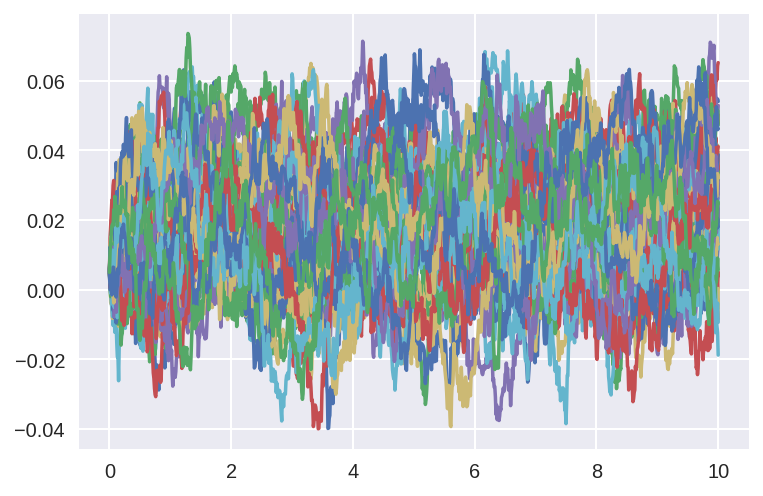

In [5]:
## creat a object iSDE
iSDE = SDE(Mu, Sigma, r0)
iSDE.PrtInitState()
MeshL = .01
MeshN = int(T/MeshL)
NumSimu = 50
R_mean = np.zeros(MeshN) #Simulation of mean of r at the time ti

## Implement Euler simulation and draw a plot of r_t, t from 0 to 10
for i in range(NumSimu): 
    [t, R, W] = iSDE.Euler(T, MeshN); 
    plt.plot(t,R);  ## the path of r_t

the path of mean of r_t is shown as below:


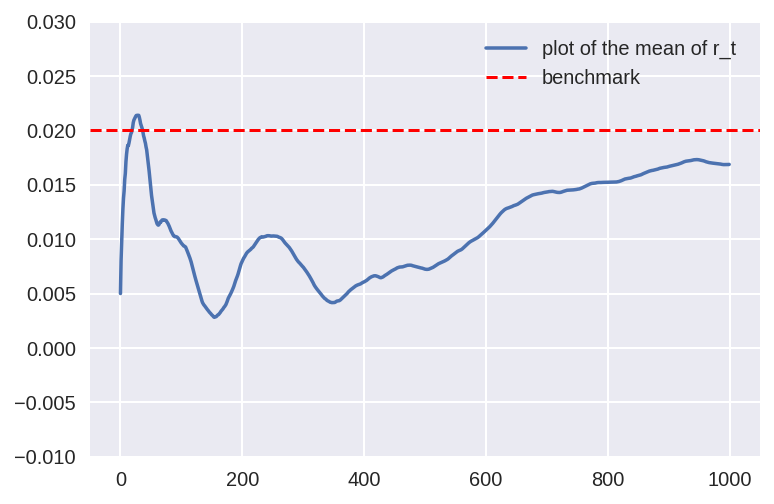

In [7]:
## get the mean of r_t at the time [0,t], t from 0 to 10
R_append = list()
for i in range(MeshN):
    R_append.append(R[i]);
    R_mean[i] = np.mean(R_append)

print("the path of mean of r_t is shown as below:")
plt.plot(range(MeshN), R_mean, label='plot of the mean of r_t ')
plt.axhline(b, color='r', ls='dashed', lw=1.5, label='benchmark')
plt.ylim(-0.01, 0.03)
plt.legend()  

__2. Find explicit form of $\mathbb E [r_t]$ and $\lim_{t\to \infty} \mathbb E [r_t]$.__

__Solution:__

We define $Y_t = F(t, r_t) = e^{\alpha t} r_t$, and we have

$$ \frac{\partial Y}{\partial t} = \alpha e_{\alpha t} r_t, \quad \frac{\partial Y}{\partial r_t} = \alpha e_{\alpha t}, \quad \frac{\partial^2 Y}{\partial r_t^2} = 0.$$

By the Ito lemma, we have

$$d Y_t = [\alpha e^{\alpha t} r_t + \alpha (b - r_t) e^{\alpha t} +0] d t + \sigma e^{\alpha t} d W_t. $$

Simplifying the above formula, we can get

$$d Y_t =  \alpha b e^{\alpha t}  d t + \sigma e^{\alpha t} d W_t ,$$

and doing integration on both sides, we have

$$ Y_t - Y_0 = \int_0^t \alpha b e^{\alpha s} ds + \int_0^t \sigma e^{\alpha s} d W_s,$$

where $Y_0 = e^{0} r_0 = r_0.$

So we have

$$
\begin{align}
 e^{\alpha t} r_t = r_0 + b e^{\alpha t} -b + \int_0^t \sigma e^{\alpha s} d W_s  \\
       =  b e^{\alpha t} + (r_0 - b) +   \int_0^t \sigma e^{\alpha s} d W_s.\\
\end{align}
$$

Easily we know the solution to the Vasicek model

$$ r_t = b + e^{-\alpha t} (r_0-b) + \int_0^t \sigma e^{\alpha (s-t)} d W_s.$$


__3. Zero bond price has the formula
$$P(0, T) = \mathbb E[\exp\{-\int_0^T r(s) ds\}].$$
Find the exact value of $P(0,1)$.__

__Solution:__

We know that for the Vasicek model, we have

$$
\begin{align}
P(t,T,r_t) =  \mathbb E[\exp\{-\int_t^T r(s) ds\}]  \\
             =  \exp\{- B(t,T) r_t + A(t,T)  \},  \\
\end{align}
$$

where

$$B(t,T) = \frac{1-e^{- \alpha (T-t)}}{\alpha},$$

$$A(t,T) = (b - \frac{\sigma^2}{2 \alpha^2}) [B(t,T) - (T-t)] - \frac{\sigma^2}{4 \alpha} B^2(t,T).$$

To solve $P(0,1)$, we have

$$P(0,1) = \exp\{- B(0,1) r_0 + A(0,1) \}, $$

where

$$B(0,1) = \frac{1-e^{- \alpha}}{\alpha},$$

$$A(0,1) = (b - \frac{\sigma^2}{2 \alpha^2}) [B(0,1) - 1] - \frac{\sigma^2}{4 \alpha} B^2(0,1).$$


In [11]:
B = (1 - np.exp(- alp))/alp
A = (b - 0.5 * sig**2 / alp**2) * (B-1) - sig**2 /4/alp * B**2
P_01 = np.exp(- B * r0 + A)
print(f"Zero coupon bond has the value: {P_01}")

Zero coupon bond has the value: 0.9863895803459704


__4. 
Run Euler, Milstein, exact simulation on $P(0,1)$ with different stepsizes, and find the covergence rate for each using linear regression. (Hint: one shall approximate integral with finite sum)__
Since zero bond price has the formula $P(0, T) = \mathbb E[\exp\{-\int_0^T r(s) ds\}],$ and we can calculate the integral by the formula

$$\int_t^T r_s d s = \int_{t_0}^{t_1} r_s d s + \int_{t_1}^{t_2} r_s d s + \cdots + \int_{t_{n-1}}^{t_n} r_s d s,$$

where $t_0 = t$ and $t_n = T.$ So we can simulate $r_t$ firstly and then approximate the integral by

$$\int_t^T r_s d s = r_{t_0}(t_1 -t_0) + r_{t_1}(t_2 -t_1) + \cdots + r_{t_{n-1}}(t_n -t_{n-1}),$$

when we can guarantee $ max_{0 \leq i \leq n} (t_i - t_{i-1}) $ to be a very little number.
To exact simulate on $P(0,1)$, we know that the Vasicek model is a special form of Hull-White model when $g(t) = \alpha b,  h(t) = - \alpha$ and $\sigma(t) = \sigma$. And we know the exact simulation of the Hull-White model is 

$$r_{t_{i+1}} = e^{H_{t_i, t_{i+1}}} r_{t_i} + \int_{t_i}^{t_{i+1}} e^{H_{t_i, t_{i+1}}} g(s) ds + \int_{t_i}^{t_{i+1}} e^{H_{t_i, t_{i+1}}} \sigma(s) d W_s, $$


where

$$H_{s,t} = \int_s^t h(u) d u .$$

So the exact simulation of the $r_t$ based on the Vasicek model is

$$r_{t_{i+1}} = e^{-\alpha \delta} r_{t_i} + b (1-e^{-\alpha \delta}) + \sqrt{\frac{\sigma^2}{2 \alpha} (1- e^{-2 \alpha \delta})} Z_i,$$

where $\delta = t_{i+1} -t_{i}$ and $Z_i \sim N(0,1)$ for every $i$ from 0 to n. 
To exact simulate on $P(0,1)$, we know that the Vasicek model is a special form of Hull-White model when $g(t) = \alpha b,  h(t) = - \alpha$ and $\sigma(t) = \sigma$. And we know the exact simulation of the Hull-White model is 

$$r_{t_{i+1}} = e^{H_{t_i, t_{i+1}}} r_{t_i} + \int_{t_i}^{t_{i+1}} e^{H_{t_i, t_{i+1}}} g(s) ds + \int_{t_i}^{t_{i+1}} e^{H_{t_i, t_{i+1}}} \sigma(s) d W_s, $$


where

$$H_{s,t} = \int_s^t h(u) d u .$$

So the exact simulation of the $r_t$ based on the Vasicek model is

$$r_{t_{i+1}} = e^{-\alpha \delta} r_{t_i} + b (1-e^{-\alpha \delta}) + \sqrt{\frac{\sigma^2}{2 \alpha} (1- e^{-2 \alpha \delta})} Z_i,$$

where $\delta = t_{i+1} -t_{i}$ and $Z_i \sim N(0,1)$ for every $i$ from 0 to n. 

By the Euler method, we can estimate the $r_t$ by the formula 

$$r_{t_{i+1}} = r_{t_i} + \alpha (b - r_{t_i}) \delta + \sigma \sqrt{\delta} Z_i ,$$

and by the Milstein method, we can estimate the $r_t$ by the formula 

$$r_{t_{i+1}} = r_{t_i} + \alpha (b - r_{t_i}) \delta + \sigma \sqrt{\delta} Z_i + 0.5 \sigma^{'}(r_t) \sigma (r_t) (W^{2}_{t,t+1} - \delta).$$

Since $\sigma$ is a constant, the Milstein method is as same as the Euler method.






__Solution__:

In [14]:
## define a new class include the three method related above.

class SDE_v2:
    def __init__(self, Mu, Sigma, InitState):
        self.Mu = Mu
        self.Sigma = Sigma
        self.InitState = InitState
        self.SigmaP = lambda r, t: 0 #first order derivative of Sigma used for Milstein; 
                                                ## initial the SigmaP to 0 since sigma is a constant
    ## Euler method
    def Euler(self, T, N):
        r0 = self.InitState
        Mu = self.Mu
        Sigma = self.Sigma
        t = np.linspace(0, T, N+1)
        DeltaT = T/N

        Wh = np.zeros(N+1) #init BM
        rh = r0 + np.zeros(N+1) #init Xh

        for i in range(N): #run EM
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            rh[i+1] = rh[i] + Mu(rh[i], t[i]) * DeltaT + Sigma(rh[i], t[i])* DeltaW

        return t, rh, Wh


    ## Milstein method
    def Milstein(self, T, N):
        r0 = self.InitState
        Mu = self.Mu
        SigmaP = self.SigmaP

        Sigma = self.Sigma
        t = np.linspace(0, T, N+1)
        DeltaT = T/N

        Wh = np.zeros(N+1) #init BM
        rh = r0 + np.zeros(N+1) #init Xh

        for i in range(N):
            DeltaW = np.sqrt(t[i+1] - t[i]) * np.random.normal()
            Wh[i+1] = Wh[i] + DeltaW
            rh[i+1] = rh[i] + Mu(rh[i], t[i]) * DeltaT + Sigma(rh[i], t[i])* DeltaW #Euler
            rh[i+1] = rh[i+1] + \
                0.5 * Sigma(rh[i], t[i]) * SigmaP(rh[i], t[i]) * (DeltaW**2 - DeltaT)

        return t, rh, Wh

    ## Exact simulation
    def Exact(self,a,b,T,sigma,N):

        r0 = self.InitState
        t = np.linspace(0, T, N+1)
        delta = T/N
        rh = r0 + np.zeros(N+1)
        sigma_hat = sigma**2*(1-np.exp(-2*a*delta))/2/a

        for i in range(N):
            rh[i+1]=rh[i]*np.exp(-a*delta)+b*(1-np.exp(-a*delta))+ np.sqrt(sigma_hat)* np.random.normal()
        return rh

#the related parameters in the problem 
alp = 2.11
b = 0.02
sig = 0.033
T = 1

Mu = lambda r,t: alp * (b - r)
Sigma = lambda r,t: sig
r0 = 0.005 #init state

P=P_01 ## the exact value of the zero coupon bond
    

In [15]:
## creat a object iSDE
oSDE = SDE_v2(Mu, Sigma, r0)
NumMesh = 1000
NumSimu = 100
deltaT=T/NumMesh

ArrLog2Steps = np.arange(6)
NumMinLog2Steps = 4 

ArrErr_Euler = np.zeros(ArrLog2Steps.size)
ArrErr_Milstein = np.zeros(ArrLog2Steps.size)
ArrErr_Exact = np.zeros(ArrLog2Steps.size)

for n in ArrLog2Steps:
    NumMesh = np.power(2, n + NumMinLog2Steps)
    errsum_Euler = 0
    errsum_Milstein = 0
    errsum_Exact = 0
        
    for i in range(NumSimu):
            
        ## Euler method
        [t, rh, Wh] = oSDE.Euler(T, NumMesh)
        PhT=np.exp(-1.0*deltaT*np.sum(rh))
        errsum_Euler = errsum_Euler + np.abs(PhT - P)
        ## plt.plot(t,rh)
        
        
        ## Milstein simulation
        [t, rh, Wh] = oSDE.Milstein(T, NumMesh)
        PhT=np.exp(-1.0*deltaT*np.sum(rh))         
        errsum_Milstein = errsum_Milstein + np.abs(PhT - P)
        ## plt.plot(t,rh)
        
        ## Exact simulation          
        rh= oSDE.Exact(alp,b,T,sig,NumMesh)
        PhT=np.exp(-1.0*deltaT*np.sum(rh))
        errsum_Exact = errsum_Exact + np.abs(PhT - P)
        ## print(PhT)
        ## plt.plot(t,rh)

    ArrErr_Euler[n] = errsum_Euler/NumSimu
    ArrErr_Milstein[n] = errsum_Milstein/NumSimu
    ArrErr_Exact[n] = errsum_Exact/NumSimu        
    

the covergence rate for Euler is 0.1308291538595301
the covergence rate for Milstein is 0.10162941871923915
the covergence rate for Exact is 0.12128320828390457


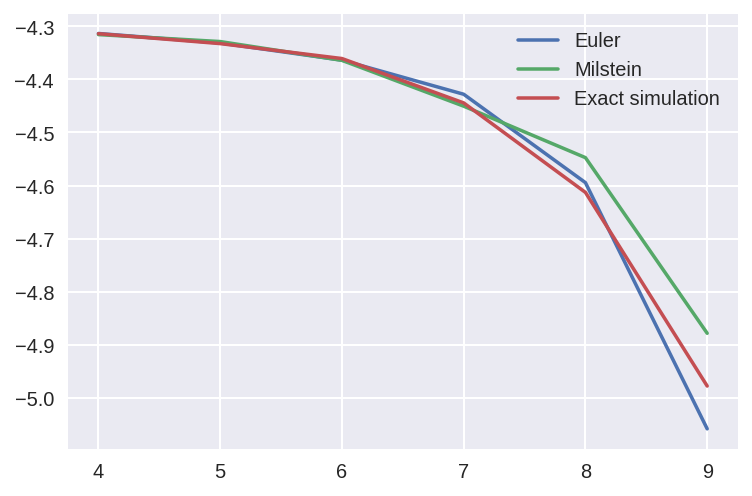

In [17]:
## print out the covergence rate

x_coordinate = ArrLog2Steps+NumMinLog2Steps
y_coordinate_Euler = np.log(ArrErr_Euler)
y_coordinate_Milstein = np.log(ArrErr_Milstein)
y_coordinate_Exact = np.log(ArrErr_Exact)    
plt.plot(x_coordinate, y_coordinate_Euler,label='Euler')
plt.plot(x_coordinate, y_coordinate_Milstein,label='Milstein')    
plt.plot(x_coordinate, y_coordinate_Exact,label='Exact simulation')
plt.legend()   
    
lg0 = stats.linregress(x_coordinate,y_coordinate_Euler)
lg1 = stats.linregress(x_coordinate,y_coordinate_Milstein)    
lg2 = stats.linregress(x_coordinate,y_coordinate_Exact)
rate0 = -lg0[0]
rate1 = -lg1[0]
rate2 = -lg2[0]
print('the covergence rate for Euler is '+ str(rate0))
print('the covergence rate for Milstein is '+ str(rate1))        
print('the covergence rate for Exact is '+ str(rate2))